# VALIDATION USING BNH

In [3]:
import optimization_NSGA2

def Eval(chrom):
  x1, x2 = chrom['x1'], chrom['x2']
  f1 = 4*(x1**2) + 4*(x2**2)
  f2 = (x1 - 5)**2 + (x2 - 5)**2
  return [f1, f2], {}

def Val(chrom):
  x1, x2 = chrom['x1'], chrom['x2']
  C1 = (x1 - 5)**2 + x2**2 #≤ 25
  C2 = (x1 - 8)**2 + (x2 + 3)**2 #≥ 7.7
  if (C1 > 25) or C2 < 7.7:
    return False
  return True

OptObject = optimization_NSGA2.NSGA2_v2(n_ind = 150, mut_rate = 0.05, t_size = 2, DecimalPoints = 8, convergence = 10, ma_len = 3, ma_tol = 0.001)
OptObject.set_population_limits({'x1':[0, 5], 'x2':[0, 3]})
OptObject.set_functions(Eval, Val)
OptObject.run()

Generation 1!
Generation 2
The Pareto is in convergence state for 0 generations
Generation 3
The Pareto is in convergence state for 1 generations
Generation 4
The Pareto is in convergence state for 0 generations
Generation 5
The Pareto is in convergence state for 0 generations
Generation 6
The Pareto is in convergence state for 0 generations
Generation 7
The Pareto is in convergence state for 0 generations
Generation 8
The Pareto is in convergence state for 1 generations
Generation 9
The Pareto is in convergence state for 2 generations
Generation 10
The Pareto is in convergence state for 3 generations
Generation 11
The Pareto is in convergence state for 4 generations
Generation 12
The Pareto is in convergence state for 5 generations
Generation 13
The Pareto is in convergence state for 6 generations
Generation 14
The Pareto is in convergence state for 7 generations
Generation 15
The Pareto is in convergence state for 8 generations
Generation 16
The Pareto is in convergence state for 9 g

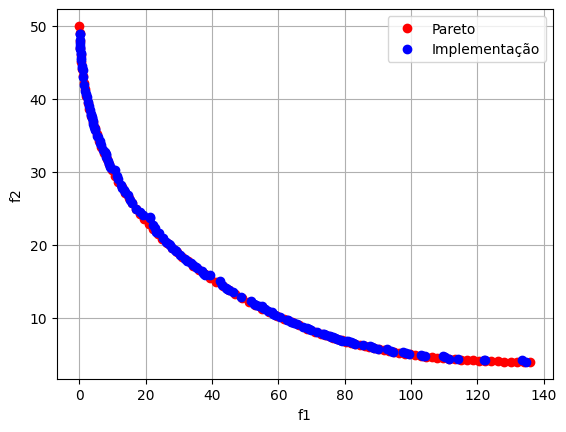

In [4]:
import matplotlib.pyplot as plt
from pymoo.problems import get_problem

problem = get_problem("bnh")
Pareto = problem.pareto_front().T
plt.plot(Pareto[0], Pareto[1], 'ro', label = "Pareto")

for ind in OptObject.current_pop:
  funcs = ind.get_ObjVal()
  plt.plot(funcs[0], funcs[1], 'bo')
plt.plot(funcs[0], funcs[1], 'bo', label = "Implementação")
plt.grid()
plt.xlabel("f1")
plt.ylabel("f2")
plt.legend()
plt.show()

# PLOTS OF NOISE

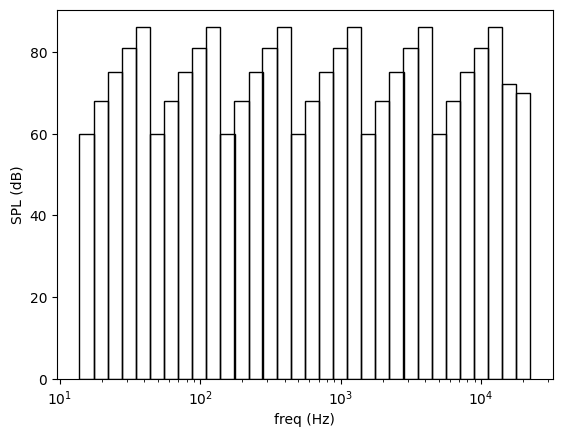

In [1]:
import noise_calc
import numpy as np

MySpectrum = noise_calc.OneThirdSpectrum()
MyNoise = [[   16.0, 60], \
           [   20.0, 68], \
           [   25.0, 75], \
           [   31.5, 81], \
           [   40.0, 86], \
           [   50.0, 60], \
           [   63.0, 68], \
           [   80.0, 75], \
           [  100.0, 81], \
           [  125.0, 86], \
           [  160.0, 60], \
           [  200.0, 68], \
           [  250.0, 75], \
           [  315.0, 81], \
           [  400.0, 86], \
           [  500.0, 60], \
           [  630.0, 68], \
           [  800.0, 75], \
           [ 1000.0, 81], \
           [ 1250.0, 86], \
           [ 1600.0, 60], \
           [ 2000.0, 68], \
           [ 2500.0, 75], \
           [ 3150.0, 81], \
           [ 4000.0, 86], \
           [ 5000.0, 60], \
           [ 6300.0, 68], \
           [ 8000.0, 75], \
           [10000.0, 81], \
           [12500.0, 86], \
           [16000.0, 72], \
           [20000.0, 70]]
MyNoise = np.array(MyNoise).T.tolist()
MySpectrum.SumToSpectrum(MyNoise[0], MyNoise[1])
MySpectrum.plot()

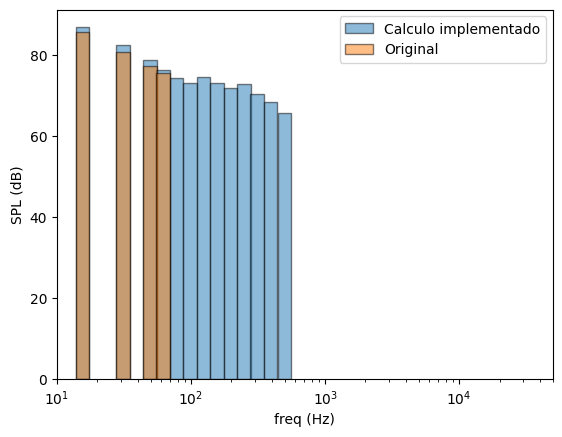

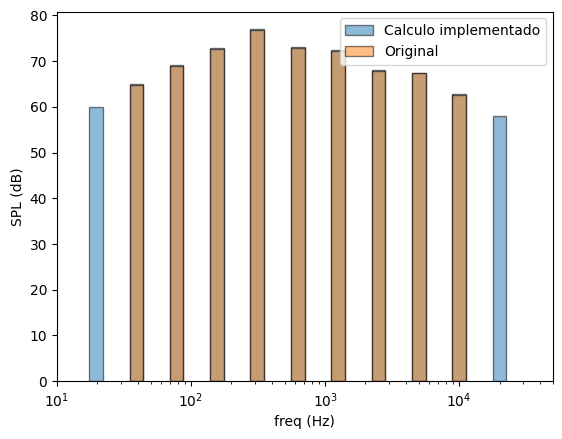

In [5]:
import noise_calc
import matplotlib.pyplot as plt

# Example 1 - MAIN ROTOR
Ex1MainOrigSpectreRot = noise_calc.OneThirdSpectrum()
Ex1MainOrigSpectreBroad = noise_calc.OneThirdSpectrum()
PaperRotationalFreqs = [17.5, 35.0, 52.5, 70.0]
PaperRotationalSPLs  = [85.7, 80.8, 77.5, 75.7]
PaperBroadBandFreqs  = [40, 80, 160, 315, 630, 1250, 2500, 5000, 10000]
PaperBroadBandSPLs   = [64.8, 69.0, 72.6, 76.8, 72.8, 72.2, 67.8, 67.3, 62.5]
Ex1MainOrigSpectreRot.SumToSpectrum(PaperRotationalFreqs, PaperRotationalSPLs)
Ex1MainOrigSpectreBroad.SumToSpectrum(PaperBroadBandFreqs, PaperBroadBandSPLs)

NBlades                       = 5
ForwardMach                   = 0
BladeTipMach                  = 0.61
RotorSpeed_1_s                = 3.5
DistObserver_m                = 61.6
RotorRad_m                    = 9.45
EffRotorRad_m                 = 8.5
Thrust_N                      = 69420
AngleRotorPlaneToObserver_deg = 5
RotorAzimuth_deg              = 0
BladeArea_m2                  = 18.6
AvgBladeCl                    = 0.438
TipSpeed_m_s                  = 208
AngleNegThrustToObserver_deg  = 85

Ex1MainSpectre = noise_calc.OneThirdSpectrum()
FreqVec_Hz, SPLVec_dB = noise_calc.RotationalNoiseSteadyUnsteadyLoading(NBlades, ForwardMach, BladeTipMach, RotorSpeed_1_s, DistObserver_m, RotorRad_m, EffRotorRad_m, Thrust_N, AngleRotorPlaneToObserver_deg, RotorAzimuth_deg)
Ex1MainSpectre.SumToSpectrum(FreqVec_Hz, SPLVec_dB)
Ex1MainSpectre.plot()
Ex1MainOrigSpectreRot.plot()
plt.legend(["Calculo implementado", "Original"], loc = 'upper right')
plt.show()

Ex1MainSpectre = noise_calc.OneThirdSpectrum()
FreqVec_Hz, SPLVec_dB = noise_calc.BroadbandNoise(BladeArea_m2, AvgBladeCl, Thrust_N, TipSpeed_m_s, DistObserver_m, AngleNegThrustToObserver_deg)
Ex1MainSpectre.SumToSpectrum(FreqVec_Hz, SPLVec_dB)
Ex1MainSpectre.plot()
Ex1MainOrigSpectreBroad.plot()
plt.legend(["Calculo implementado", "Original"], loc = 'upper right')
plt.show()

# # Example 1 - TAIL ROTOR
# Ex1TailOrigSpectreRot = noise_calc.OneThirdSpectrum()
# Ex1TailOrigSpectreBroad = noise_calc.OneThirdSpectrum()
# PaperRotationalFreqs = [105, 210, 315, 420]
# PaperRotationalSPLs  = [85.1, 79.9, 76.6, 74.5]
# PaperBroadBandFreqs  = [20, 40, 80, 160, 315, 630, 1250, 2500, 5000, 10000]
# PaperBroadBandSPLs   = [56.1, 58.6, 63.6, 67.8, 71.4, 75.6, 71.6, 71.0, 66.6, 66.1]
# Ex1TailOrigSpectreRot.SumToSpectrum(PaperRotationalFreqs, PaperRotationalSPLs)
# Ex1TailOrigSpectreBroad.SumToSpectrum(PaperBroadBandFreqs, PaperBroadBandSPLs)

# NBlades                       = 2
# ForwardMach                   = 0
# BladeTipMach                  = 0.9
# RotorSpeed_1_s                = 3.14
# DistObserver_m                = 47.2
# RotorRad_m                    = 1.05
# EffRotorRad_m                 = 0.934
# Thrust_N                      = 485
# AngleRotorPlaneToObserver_deg = 0
# RotorAzimuth_deg              = 0
# BladeArea_m2                  = 3.44
# AvgBladeCl                    = 0.182
# TipSpeed_m_s                  = 202
# AngleNegThrustToObserver_deg  = 10

# Ex1TailSpectre = noise_calc.OneThirdSpectrum()
# FreqVec_Hz, SPLVec_dB = noise_calc.RotationalNoiseSteadyUnsteadyLoading(NBlades, ForwardMach, BladeTipMach, RotorSpeed_1_s, DistObserver_m, RotorRad_m, EffRotorRad_m, Thrust_N, AngleRotorPlaneToObserver_deg, RotorAzimuth_deg)
# Ex1TailSpectre.SumToSpectrum(FreqVec_Hz, SPLVec_dB)
# Ex1TailSpectre.plot()
# Ex1TailOrigSpectreRot.plot()
# plt.legend(["Calculated", "Original"])
# plt.show()

# Ex1TailSpectre = noise_calc.OneThirdSpectrum()
# FreqVec_Hz, SPLVec_dB = noise_calc.BroadbandNoise(BladeArea_m2, AvgBladeCl, Thrust_N, TipSpeed_m_s, DistObserver_m, AngleNegThrustToObserver_deg)
# Ex1TailSpectre.SumToSpectrum(FreqVec_Hz, SPLVec_dB)
# Ex1TailSpectre.plot()
# Ex1TailOrigSpectreBroad.plot()
# plt.legend(["Calculated", "Original"])
# plt.show()

# PaperTotalFreqs = [16, 20, 31.5, 40, 50, 63, 80, 100, 160, 200, 315, 400, 630, 1250, 2500]
# PaperTotalSPLs  = [85.7, 54.1, 80.8, 66.5, 77.5, 75.7, 70.1, 85.1, 73.8, 79.9, 80.3, 74.5, 77.4, 74.9, 72.7]


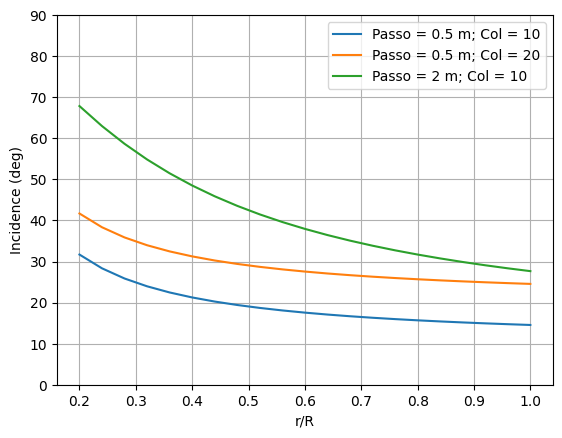

In [12]:
import prop_design
import numpy as np
import matplotlib.pyplot as plt

SpinnerCutoff = 0.2
NStations = 21
Diam_m = 2

Pitch_m = 0.5
Colective_deg = 10

S = np.linspace(0, 0.9999, NStations, endpoint = True)
RadialStations_adim = [SpinnerCutoff + (1 - SpinnerCutoff)*s for s in S]
RadialStations_m = [r*Diam_m/2 for r in RadialStations_adim]

TwistDist_deg     = prop_design.simple_pitch(RadialStations_m, Pitch_m)
TwistDistColl_deg = [twist + Colective_deg for twist in TwistDist_deg]
plt.plot(RadialStations_adim, TwistDistColl_deg, label = f'Passo = {Pitch_m} m; Col = {Colective_deg}')

Pitch_m = 0.5
Colective_deg = 20

S = np.linspace(0, 0.9999, NStations, endpoint = True)
RadialStations_adim = [SpinnerCutoff + (1 - SpinnerCutoff)*s for s in S]
RadialStations_m = [r*Diam_m/2 for r in RadialStations_adim]

TwistDist_deg     = prop_design.simple_pitch(RadialStations_m, Pitch_m)
TwistDistColl_deg = [twist + Colective_deg for twist in TwistDist_deg]
plt.plot(RadialStations_adim, TwistDistColl_deg, label = f'Passo = {Pitch_m} m; Col = {Colective_deg}')

Pitch_m = 2
Colective_deg = 10

S = np.linspace(0, 0.9999, NStations, endpoint = True)
RadialStations_adim = [SpinnerCutoff + (1 - SpinnerCutoff)*s for s in S]
RadialStations_m = [r*Diam_m/2 for r in RadialStations_adim]

TwistDist_deg     = prop_design.simple_pitch(RadialStations_m, Pitch_m)
TwistDistColl_deg = [twist + Colective_deg for twist in TwistDist_deg]
plt.plot(RadialStations_adim, TwistDistColl_deg, label = f'Passo = {Pitch_m} m; Col = {Colective_deg}')

plt.ylim([0, 90])
plt.ylabel("Incidence (deg)")
plt.xlabel("r/R")
plt.grid()
plt.legend()
plt.show()


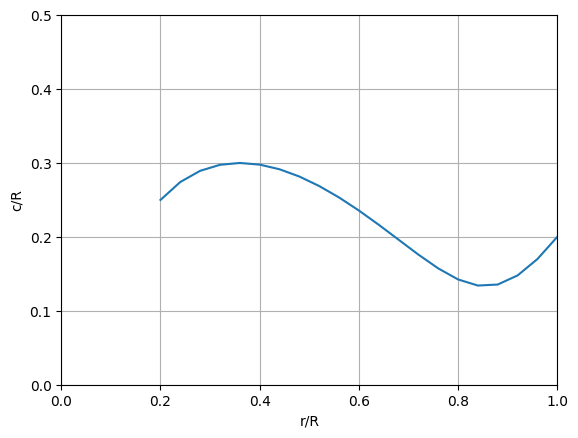

In [20]:
import prop_design
import numpy as np
import matplotlib.pyplot as plt

SpinnerCutoff = 0.2
NStations = 21

Croot_adim = 0.25
Cmax_adim = 0.3
Smax_adim = 0.2
Ctip_adim = 0.2

#c_R = (a*r**3 + b*r**2 + c*r + d)**0.5
a = -(2*Cmax_adim**2*Smax_adim - Cmax_adim**2 + Croot_adim**2*Smax_adim**2 - 2*Croot_adim**2*Smax_adim + Croot_adim**2 - Ctip_adim**2*Smax_adim**2)/(Smax_adim**2*(Smax_adim - 1)**2)
b = -(- 3*Cmax_adim**2*Smax_adim**2 + Cmax_adim**2 - 2*Croot_adim**2*Smax_adim**3 + 3*Croot_adim**2*Smax_adim**2 - Croot_adim**2 + 2*Ctip_adim**2*Smax_adim**3)/(Smax_adim**2*(Smax_adim - 1)**2)
c = -(3*Cmax_adim**2*Smax_adim - 2*Cmax_adim**2 + Croot_adim**2*Smax_adim**3 - 3*Croot_adim**2*Smax_adim + 2*Croot_adim**2 - Ctip_adim**2*Smax_adim**3)/(Smax_adim*(Smax_adim - 1)**2)
d = Croot_adim**2

S = np.linspace(0, 0.9999, NStations, endpoint = True)
RadialStations_adim = [SpinnerCutoff + (1 - SpinnerCutoff)*s for s in S]
RadialStations_m = [r*Diam_m/2 for r in RadialStations_adim]
ChordDistribution_adim = [(a*s**3 + b*s**2 + c*s + d)**0.5 for s in S]
ChordDistribution_m = [((a*s**3 + b*s**2 + c*s + d)**0.5)*Diam_m/2 for s in S]

plt.plot(RadialStations_adim, ChordDistribution_adim)
plt.ylim([0, 0.5])
plt.xlim([0, 1])
plt.ylabel("c/R")
plt.xlabel("r/R")
plt.grid()
plt.show()